# Task1 MINIST TRAINING AND TEST ——PART1

### 本任务的目的是通过minist手写数据集的训练实现对现实手写数字的识别。
1. 用两种方式构建CNN网络
2. 熟悉数据处理到模型构建-训练-预测-保存整个过程


* step1 加载必要的库函数

In [2]:
# import numpy as np
# from keras.datasets import mnist
# from keras.utils.np_utils import to_categorical
# from keras.models import Sequential
# from keras.layers import Dense, Activation,Conv2D,Input
# from keras.models import Model
# from keras.optimizers import RMSprop
# from matplotlib import pyplot as plt
# for tf2.0
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense, Activation, Conv2D,Input
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
#

* step2 minist数据在keras中自带，可以通过网络加载

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)

(60000, 28, 28)


(60000, 28, 28) (10000, 28, 28)


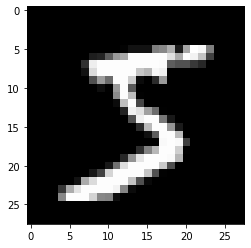

In [4]:
#confirm the data dimention
print(X_train.shape,X_test.shape) 
plt.imshow(X_train[0,:,:],cmap='gray')

* step3 标准化处理

In [5]:
# data pre-processing
X_train = X_train.reshape(X_train.shape[0], -1) / 255.   # normalize
X_test = X_test.reshape(X_test.shape[0], -1) / 255.      # normalize

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
print(X_train.shape)

(60000, 784)


* step4 构建CNN网络

In [6]:
# model-sequential
model = Sequential([
    Dense(64, input_dim=784),
    Dense(32, input_dim=64),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
activation (Activation)      (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [7]:
# model-function
inputs = Input(shape=(784,))
x = Dense(64)(inputs)
x = Dense(32)(x)
x = Activation('relu')(x)
x = Dense(10,activation='softmax')(x)
model=Model(inputs,x)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
activation_2 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


* setp5 训练模型

In [8]:
# Another way to define your optimizer
rmsprop = RMSprop(lr=0.0001, rho=0.9, epsilon=1e-08, decay=0.0)
# We add metrics to get more results you want to see
model.compile(optimizer=rmsprop,loss='categorical_crossentropy',metrics=['accuracy'])

C:\yujunchuan\Anaconda\envs\py20\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [9]:
print('Training ------------')
# Another way to train the model
model.fit(X_train, y_train, epochs=10, verbose=1, shuffle=True,batch_size=128,validation_data=(X_test,y_test))

Training ------------
Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 1.0873 - accuracy: 0.7193 - val_loss: 0.5184 - val_accuracy: 0.8692
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.4359 - accuracy: 0.8829 - val_loss: 0.3550 - val_accuracy: 0.9030
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3425 - accuracy: 0.9036 - val_loss: 0.3071 - val_accuracy: 0.9132
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3043 - accuracy: 0.9135 - val_loss: 0.2826 - val_accuracy: 0.9197
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2813 - accuracy: 0.9199 - val_loss: 0.2644 - val_accuracy: 0.9235
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2643 - accuracy: 0.9247 - val_loss: 0.2537 - val_accuracy: 0.9266
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2513 - accuracy: 0.9284 - val_loss: 0.2438 - val_a

(100, 10)
[[  0.   0.   0.   0.   0.   0.   0. 100.   0.   0.]] 7


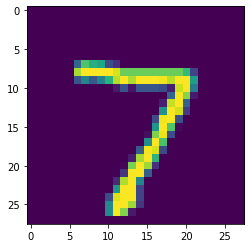

In [10]:
# test the model 
testdata=X_test[:100]
# get the probability value
pred=model.predict(testdata,batch_size=20)
# get the classification value
pred_c=np.argmax(pred,axis=1)
# pred_c=model.predict_classes(testdata,batch_size=20)
print(pred.shape)
reshapedata=testdata.reshape(100,28,28)
plt.imshow(reshapedata[0,:,:])
print(np.round(pred[:1]*100),pred_c[0])

* setp5保存模型

In [107]:
model.save('./mnist.h5')